# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goals of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition:

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. 

For more on the evalauation of this project, check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for the most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model, which minimzes RMSLE.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can download this file directly from the Kaggle competition page (account required) or view it on Google Sheets.

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

### Importing the data and preparing it for modelling

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [164]:
# Import the training and valiadation sets
df = pd.read_csv('C:/Users/xavie/Downloads/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory = False)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SalesID                             412698 non-null  int64  
 1   SalePrice                           412698 non-null  float64
 2   MachineID                           412698 non-null  int64  
 3   ModelID                             412698 non-null  int64  
 4   datasource                          412698 non-null  int64  
 5   auctioneerID                        412698 non-null  float64
 6   YearMade                            412698 non-null  int64  
 7   MachineHoursCurrentMeter            412698 non-null  float64
 8   UsageBand                           73670 non-null   object 
 9   fiModelDesc                         412698 non-null  object 
 10  fiBaseModel                         412698 non-null  object 
 11  fiSecondaryDesc           

In [166]:
df.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

KeyError: 'saledate'

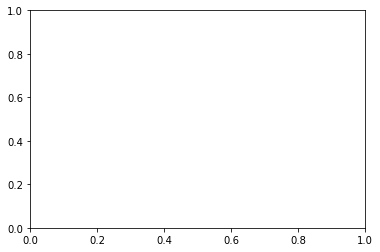

In [167]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]); # troubles b/c of saledate data type

In [ ]:
df.SalePrice.plot.hist(); # great display of price and sell of bulldozers

In [ ]:
df.saledate[:1000] # dtype object

### Parsing dates

When we work with time series data,  we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it, using the `parse dates` parameter.

In [ ]:
# Import data again, but this time parse dates
df = pd.read_csv('C:/Users/xavie/Downloads/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory = False,
                 parse_dates = ['saledate'])

In [ ]:
df.saledate.dtype

In [ ]:
df.saledate[:1000]

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]); # can now research the reason behind the markets behavior for further context of data, if you'd like

In [ ]:
df.head().T # T is to transpose, so that all the columns can be viewed

In [ ]:
df.saledate.head(20) # dates are out of order

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [ ]:
# Sort DataFrame in date order
df.sort_values(by = ['saledate'], inplace = True, ascending = True)
df.saledate.head(20)

In [ ]:
df.head()

### Make a copy of the original DataFrame

We make a copy of the original DataFrame, so when we manipulate the copy, we've still got our original data.

In [ ]:
# Make a copy
df_tmp = df.copy()

In [ ]:
df_tmp.head(20).T

### Add datetime parameters for `saledate` column

In [ ]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [ ]:
df_tmp.head().T

In [ ]:
# Now we've enriched our DataFrame with date time features, we can remove saledate
df_tmp.drop('saledate', axis = 1, inplace = True)

In [ ]:
# Check the values of different columns
df_tmp.state.value_counts()

## 5. Modelling

We've done enough EDA. We could always do more, but let's start to do some model-driven EDA.

In [ ]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, 
                              random_state = 42) # same as np.random.seed(42)
model.fit(df_tmp.drop('SalePrice', axis = 1, ), df_tmp['SalePrice'])

**ValueError: could not convert string to float: 'Low'**

Need to fix the data types of the different columns, and handle the missing data.

In [ ]:
# Check for missing categories and different datatypes
df_tmp.info()

In [ ]:
# Check for missing values
df_tmp.isna().sum()

### Convert string to category

One way we can turn all of our data into numbers is by converting them in categories.

We can check the different data types compatible with pandas here:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [ ]:
df_tmp.head()

In [ ]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

In [ ]:
# Find the columns which contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
# If you're wondering what df.items() does, here's an example
random_dict = {'key1': 'hello',
               'key2': 'world!'}

for key, value in random_dict.items():
    print(f'This is a key: {key}')
    print(f'This is a value: {value}')

In [ ]:
# This will turn all the string values into category values
for label, content in df_tmp.items():
    if  pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_tmp.info()

In [ ]:
df_tmp.state.cat.categories # still looks like strings, but pandas treats them as numbers

In [ ]:
df_tmp.state.cat.codes # each state (all category columns) is a number now

Thanks to pandas Categories, we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data..

In [ ]:
# Check missing data
df_tmp.isna().sum()/ len(df_tmp)

### Save Preprocessed Data

In [ ]:
# Save preprocessed data (Export current tmp DataFrame)
df_tmp.to_csv('C:/Users/xavie/Downloads/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv',
              index=False)

In [ ]:
# Import preprocessed data
df_tmp = pd.read_csv("C:/Users/xavie/Downloads/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",
                     low_memory=False)
df_tmp.head().T

In [ ]:
df.isna().sum()

## Fill missing values

From our experience with machine learning models. We know two things:
1. All of our data has to be numerical
2. There can't be any missing values

And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.

Let's fill them.

### Fill numerical missing values first

We're going to fill any column with missing values with the median of that column.

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
df_tmp.ModelID

In [ ]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column to tell us if the data was missing or not
            df_tmp[label + '_is_missing'] = pd.isnull(content) # column acknowledges a row had missing data, just in case, after the row is filled, we find out later that it was important for the column to be missing data
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median()) # median is more robust than mean (mean is very sensitive to outliers)

In [ ]:
# Demonstrate how median is more robust than mean
# 1,000 people with 100 dollars on them
hundreds = np.full((1000,), 100) 
# Bill Gates walks in with a billion dollars
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

In [ ]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label) # prints nothing because it is filled

In [ ]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

In [ ]:
df_tmp.isna().sum()

### Filling and turning categorical variables into numbers

In [ ]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [ ]:
pd.Categorical(df_tmp['state']).codes

In [ ]:
# Turn categroical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label + '_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [ ]:
# Pandas assigns missing values a -1, so do +1 to make them 0
pd.Categorical(df_tmp['state']).codes + 1

In [ ]:
# Example of why we do +1
pd.Categorical(df_tmp['UsageBand']).codes

In [ ]:
df_tmp.info()

In [ ]:
df_tmp.head().T

In [ ]:
df_tmp.isna().sum()

Now that all of data is numeric, as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [ ]:
df_tmp.head()

In [ ]:
len(df_tmp)

In [ ]:
%%time
# One of many Jupyter magic functions - calculates time cell takes to run

# Instantiate model
model = RandomForestRegressor(n_jobs = -1,
                               random_state = 42)

# Fit the model (dataframe is train and valid data)
model.fit(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

In [ ]:
# Score the model
model.score(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

**Question:** Why isn't this metric reliable?

Remember: 

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

### Splitting data into train/ validation sets

In [ ]:
df_tmp.saleYear

In [ ]:
df_tmp.saleYear.value_counts()

In [ ]:
# Split data into training and validation sets
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

In [ ]:
# Split dat into X & y
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis = 1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

In [ ]:
y_train

### Building an evaluation function
According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is root mean squared log error (RMSLE).

**RMSLE** = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. **MAE** (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.

In [ ]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculate root mean squred log error between predictions and
    true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid) # better than train preds = overfit
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# This takes far too long for experimenting

# %%time
# model = RandomForestRegressor(n_jobs = -1,
#                              random_state = 42)

# model.fit(X_train, y_train)

In [ ]:
len(X_train)

In [ ]:
# Change max_samples value
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42,
                              max_samples = 10000)

In [ ]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

In [ ]:
show_scores(model) 

### Hyperparameter tuning eith RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state = 42),
                              param_distributions = rf_grid,
                              n_iter = 2, # to keep the cell time down
                              cv = 5,
                              verbose = True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

In [ ]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

### Train a model with the best hyperparameters

In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting n_iter to 100 in `RandomizedSearchCV)` and found the best results came from the ones you see below.

**Note:** This kind of search on my computer (n_iter = 100) took ~2-hours. So it's kind of a set and come back later experiment.

We'll instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.


In [ ]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

In [ ]:
# scores for ideal model (trained on all the data)
show_scores(ideal_model) 

In [ ]:
# scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

### Make predictions on test data

In [ ]:
# Import the test data
df_test = pd.read_csv('C:/Users/xavie/Downloads/bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv',
                       low_memory = False,
                       parse_dates = ['saledate'])

df_test.head()

In [ ]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

In [ ]:
df_test.isna().sum() # Missing values

In [ ]:
df.info() # values are not numeric

### Preprocessing the data (getting the test data set in the same format as the training dataset)

In [ ]:
def preprocess_data(df):
    '''
    Performs transformations on df, and returns transformed df.
    '''
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

**Question:** Where would this function break?

**Hint:** What if the test data had different missing values to the training data?

Now we've got a function for preprocessing data, let's preprocess the test dataset into the same format as our training dataset.

In [ ]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

In [ ]:
X_train.head()

In [ ]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

In [ ]:
# We can find out how the columns are different using sets
set(X_train.columns) - set(df_test.columns)

In [ ]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [ ]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [ ]:
test_preds

We've made some predictions but they're not in the same format Kaggle is asking for. When looking at the Kaggle submission requirements, we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the SalesID and the predicted SalePrice of the bulldozer.

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [ ]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

In [ ]:
# Export prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where **feature importance** comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for random forests can lead to non-ideal results.

To find which features were most important of a machine learning model, a good idea is to search something like "[MODEL NAME] feature importance".

Doing this for our `RandomForestRegressor` leads us to find the `feature_importances_` attribute.

Let's check it out.

In [ ]:
# Find feature importance of our best model
ideal_model.feature_importances_

In [ ]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [ ]:
sum(ideal_model.feature_importances_)

In [ ]:
df.ProductSize.isna().sum()

In [ ]:
df.ProductSize.value_counts()

In [ ]:
df.Turbocharged.value_counts()

In [ ]:
df.Thumb.value_counts()

### Alternative finish to Feature Importance

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [ ]:
df["Enclosure"].value_counts()

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful?

**Final challenge/extension:** What other machine learning models could you try on our dataset? Hint: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html check out the regression section of this map, or try to look at something like CatBoost.ai or XGBooost.ai.